# Simple birth process

To illustrate a continuous time stochastic process.

## Import modules

In [24]:
# Common imports
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

From Dobrow, Section 1, Figure 1.1.

Consider first a deterministic bacteria growth model in which the number of bacteria increases by 20% per minute. Let us measure time $t$ in minutes and the number of bacteria $y(t)* fulfills

$$
\frac{dy}{dt} = 0.20 y
$$

with the solution $y(t) = y_0 \exp(0.2t)$, where $y_0$ is the number at $t=0$.

In [127]:
t = np.linspace(0,16,num=20000)
lam=0.25
y0=10

In [128]:
def y_deterministic(t,y0=1,lam=0.2):
    return y0*np.exp(lam*t)

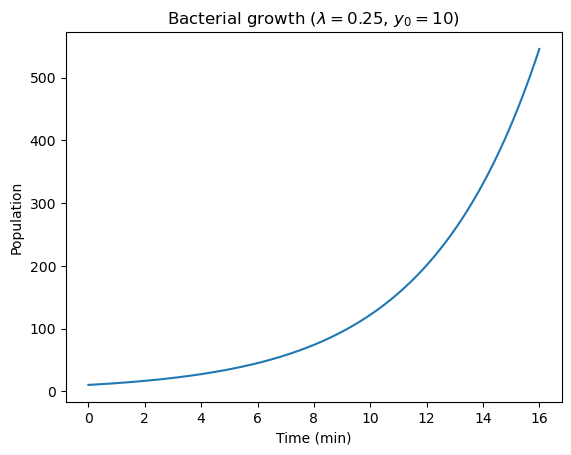

In [129]:
plt.plot(t,y_deterministic(t,lam=lam,y0=y0))
ax=plt.gca()
ax.set_xlabel('Time (min)')
ax.set_ylabel('Population')
ax.set_title(rf'Bacterial growth ($\lambda={lam}$, $y_0={y0}$)');

Let's study a stochastic birth process where the probability for one bacteria to split in two during a small time interval $\Delta t$ is $\lambda \Delta t$. This time needs to short enough such that we can ignore the probabiltiy that two splits occur.

In [130]:
def y_stochastic(t,y0=1,lam=0.2):
    y = [y0]
    assert max(t[1:]-t[:-1])/lam < 0.01, "The time interval must be much smaller than lambda."
    t_old = t[0]
    for t_i in t[1:]:
        dt = t_i-t_old
        t_old=t_i
        y_i = y[-1]
        # Increase the number of bacteria by the number of splits
        y_i += np.sum(np.random.random(y_i)<lam*dt)
        y.append(y_i)
    return np.array(y)

In [131]:
y_run = y_stochastic(t,y0=y0,lam=lam)

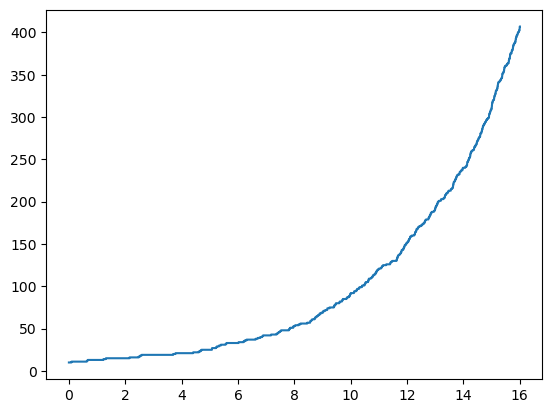

In [132]:
plt.plot(t,y_run);

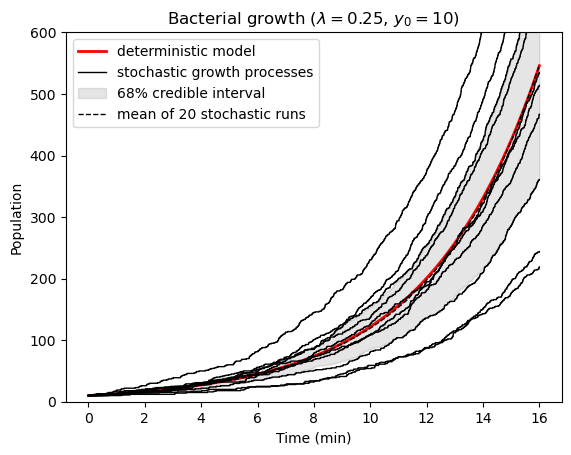

In [146]:
# Combine the plots
# deterministic
plt.plot(t,y_deterministic(t,lam=lam,y0=y0),label='deterministic model',lw=2,color='red')
y_max = 1.1 * y_deterministic(t[-1],lam=lam,y0=y0)
ax=plt.gca()
np.random.seed(seed=3)
num_runs=20
y_runs = np.zeros((num_runs,len(t)))
for irun in range(num_runs):
    y_run = y_stochastic(t,lam=lam,y0=y0)
    if irun==0: label='stochastic growth processes'
    else: label=''
    if irun%2==0:
        ax.plot(t,y_run,lw=1,color='k',label=label)
    y_runs[irun,:] = y_run
(y_lo,y_median,y_hi) = np.percentile(y_runs,[16,50,84],axis=0)
y_mean = y_runs.mean(axis=0)
#y_std = y_runs.std(axis=0)
#ax.fill_between(t,y1=y_mean-y_std,y2=y_mean+y_std,color='k',alpha=0.1)
ax.fill_between(t,y1=y_lo,y2=y_hi,color='k',alpha=0.1,label='68% credible interval')
ax.plot(t,y_mean,lw=1,ls='--',color='k',label=f'mean of {num_runs} stochastic runs')
#ax.plot(t,y_median,lw=1,ls='--',color='k',label=f'median of {num_runs} stochastic runs')
ax.set_ylim((0,y_max))
ax.legend(loc='best')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Population')
ax.set_title(rf'Bacterial growth ($\lambda={lam}$, $y_0={y0}$)');

In [144]:
y_deterministic(11,lam=lam,y0=y0)/y0

15.642631884188171

In [165]:
np.argmin(np.abs(t-10))

12499

In [167]:
np.sum(y_runs[:,12499]>100)

13

In [164]:
np.sum(y_runs[:,6250]/y0>4)

4